In [32]:
import pandas as pd
import csv
import math

df = pd.read_csv('crime.csv', sep=",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", engine="python", quoting=csv.QUOTE_NONE, header=0)

#data =  sns.load_dataset('crime.csv',{'sep':",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)",'engine':"python", 'quoting':'csv.QUOTE_NONE', 'header':'0'})
# Data Preparation
# Replace NaN with 'N'
df = df.replace({float('nan'):'N'})
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"""(42.26260773, -71.12118637)"""
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"""(42.35211146, -71.13531147)"""
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"""(42.30812619, -71.07692974)"""
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"""(42.35945371, -71.05964817)"""
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"""(42.37525782, -71.02466343)"""


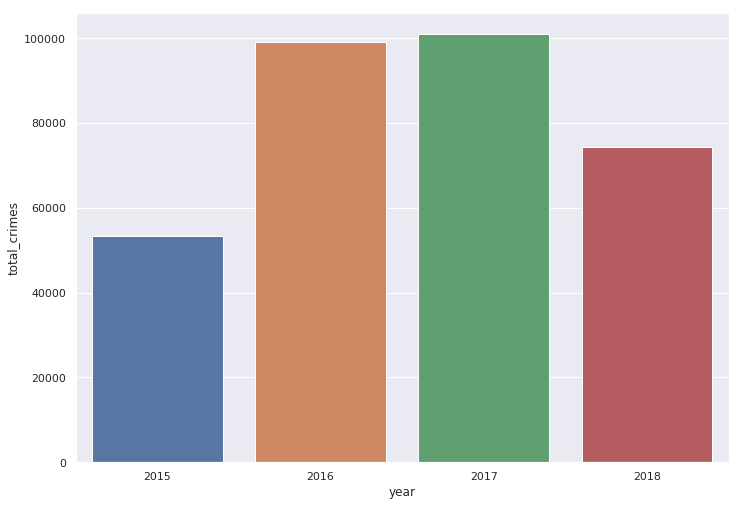

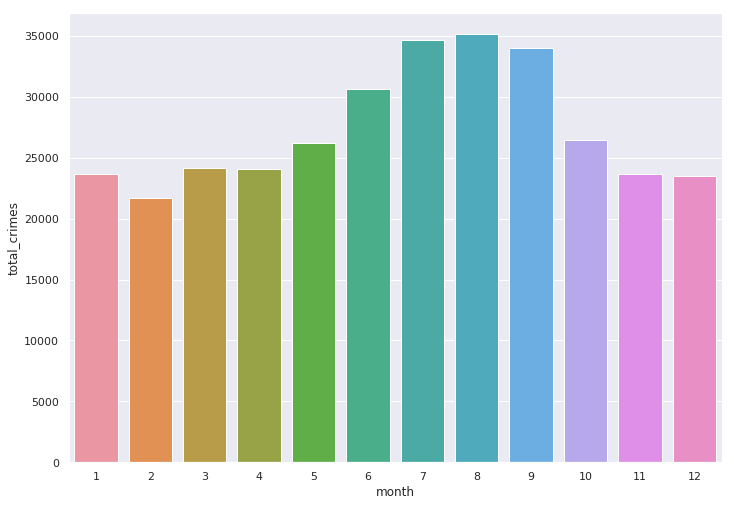

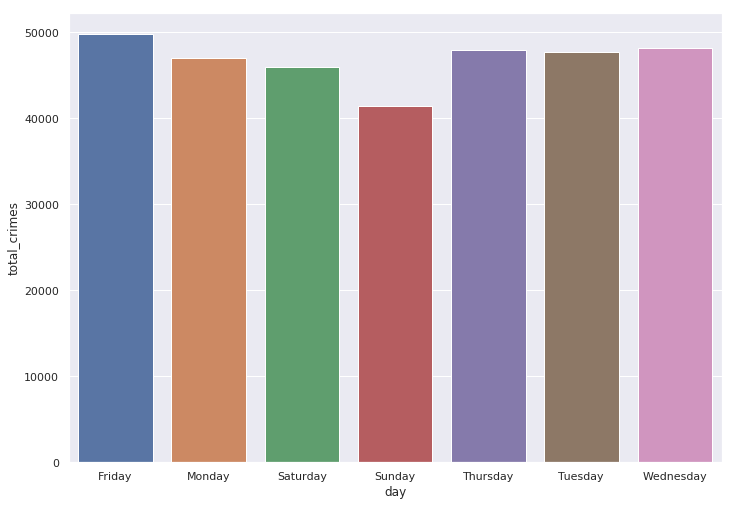

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Per year - month - day
series_year = df.groupby(['YEAR']).size()
series_month = df.groupby(['MONTH']).size()
series_day = df.groupby(['DAY_OF_WEEK']).size()

df_year = pd.DataFrame({'year':series_year.index, 'total_crimes':series_year.values})
df_month = pd.DataFrame({'month':series_month.index, 'total_crimes':series_month.values})
df_day = pd.DataFrame({'day':series_day.index, 'total_crimes':series_day.values})

plot_year = sns.barplot(x="year", y="total_crimes", data=df_year)
plt.show()
plot_month = sns.barplot(x="month", y="total_crimes", data=df_month)
plt.show()
plot_day = sns.barplot(x="day", y="total_crimes", data=df_day)
plt.show()


#print(plot_year, plot_month, plot_day)




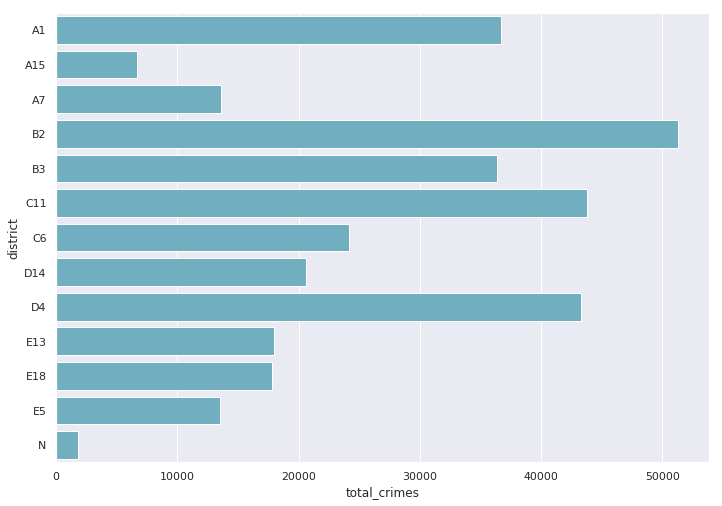

In [31]:
# Per District
series_district = df.groupby(['DISTRICT']).size()
df_district = pd.DataFrame({'district':series_district.index, 'total_crimes':series_district.values})
plot_year = sns.barplot(x="total_crimes", y="district", data=df_district, color="c")
plt.show()

In [41]:
#YEAR WITH MOST SHOOTING INCIDENTS
series_shooting_per_year = df.groupby(['SHOOTING','YEAR']).size()
print(series_shooting_per_year['Y'].idxmax())

#DISTRICT WITH MOST SHOOTING INCIDENTS
series_shooting_per_district = df.groupby(['SHOOTING','DISTRICT']).size()
print(series_shooting_per_district['Y'].idxmax())

2017
B2


In [53]:
#CRIMES PER DAYTIME AND PER NIGHT TIME
df['DAY_OR_NIGHT'] = df['HOUR'].map(lambda x: 'N' if x >= 18 or x < 6 else 'D')
series_day_or_night = df.groupby(['DAY_OR_NIGHT']).size()
pd.DataFrame({'day / night':series_day_or_night.index, 'total crimes':series_day_or_night.values})


,day / night,total crimes
0,D,189442
1,N,138378


In [55]:
#MOST COMMON OFFENSE CODE DURING DAYTIME
series_offense_code_time = df.groupby(['DAY_OR_NIGHT','OFFENSE_CODE_GROUP']).size()
print(series_offense_code_time['D'].idxmax())


Motor Vehicle Accident Response


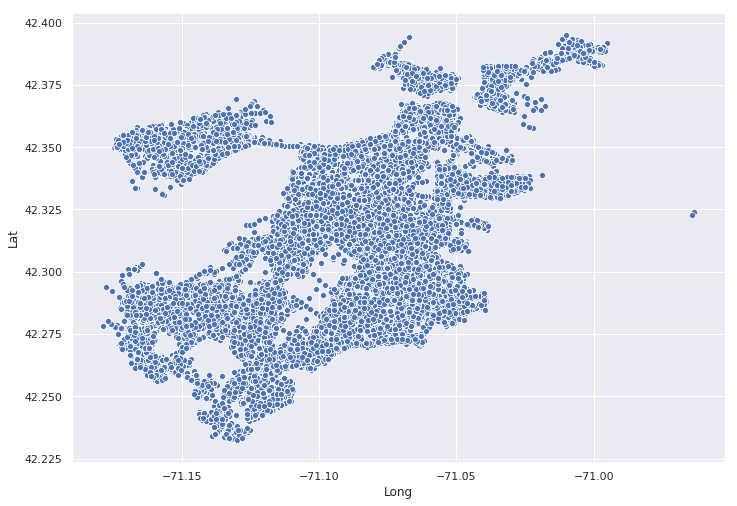

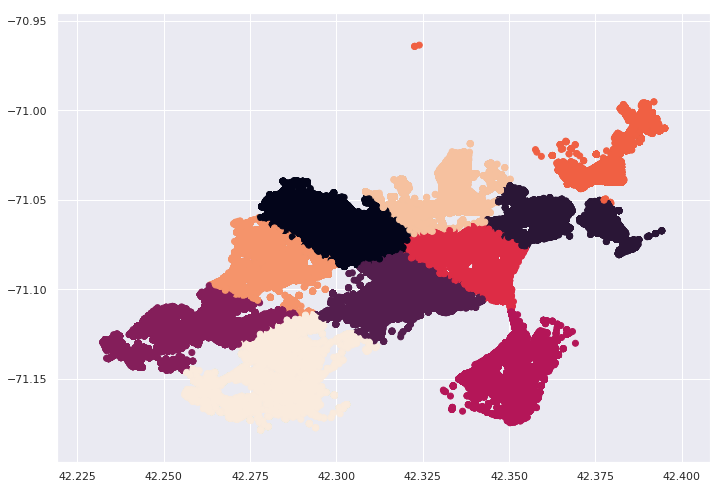

In [94]:
#K-MEANS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

X = df[['Lat', 'Long']]
X = X[X.Lat != 'N']
X = X.loc[(X['Lat'] > 40) & (X['Long'] < -60)]
sns.scatterplot(x="Long", y="Lat",data = X)
plt.show()
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(X.values)
kmeans.predict(X.values)
plt.scatter(X.values[:,0], X.values[:,1], c=model.labels_.astype(float))
plt.show()